# Interface Segregation Principle
No debe obligarse a las clases a implementar métodos que no necesitan. En lugar de eso, se deben crear interfaces más pequeñas y específicas que sean implementadas solo por las clases que las necesiten.

Imagina que creaste una librería que facilita la integración de aplicaciones con varios proveedores de computación en la nube. Aunque en la versión inicial sólo soportaba Amazon Cloud, cubría todos los servicios y funciones de la nube. </br>
En aquel momento asumiste que todos los proveedores en la nube tienen la misma amplitud de espectro de funciones que Amazon. Pero cuando hubo que implementar soporte para otro proveedor, resultó que la mayoría de las interfaces de la librería eran demasiado amplias. Algunos métodos describen funciones que otros proveedores de la nube no incluyen.


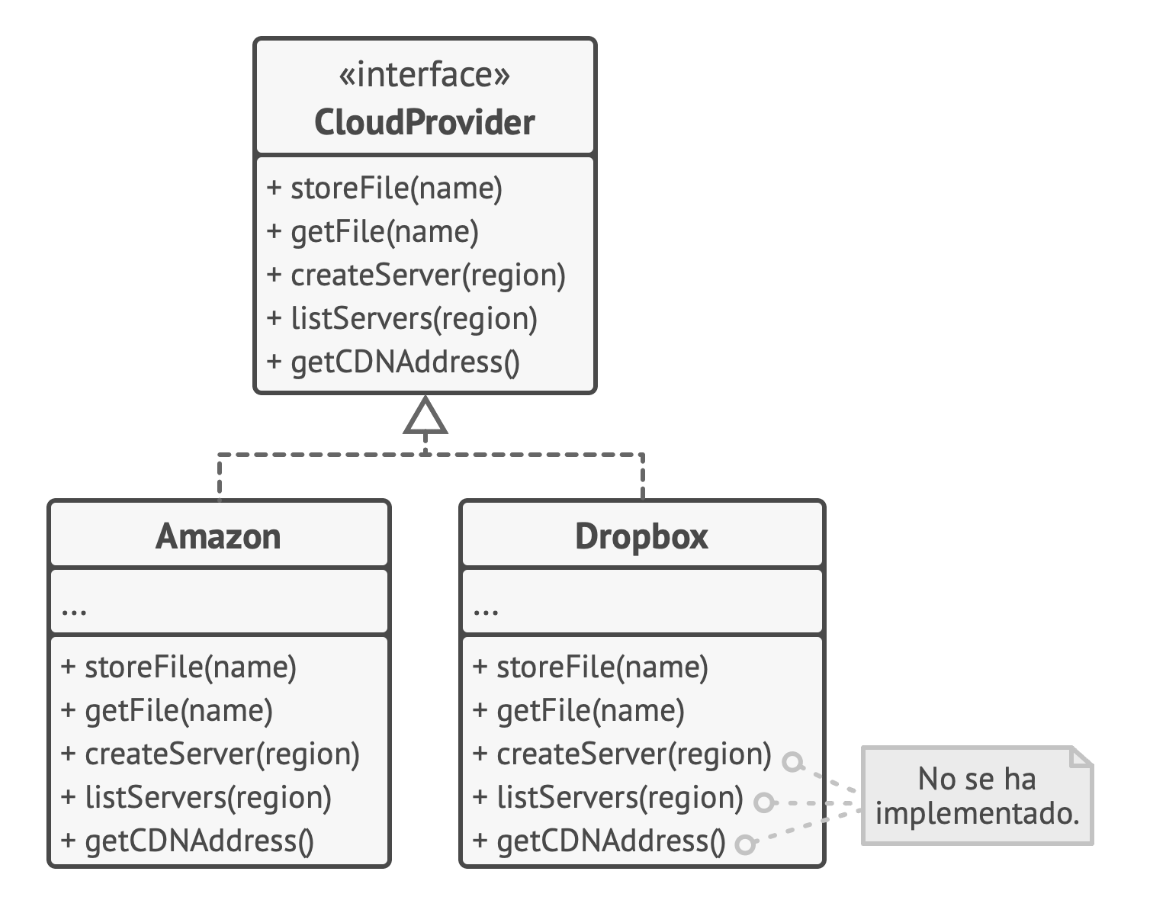

**Antes:** No todos los clientes pueden satisfacer los requisitos de la interfaz `CloudProvider`. 

In [1]:
from abc import ABC, abstractmethod


class CloudProvider(ABC):
    @abstractmethod
    def store_file(self, name):
        pass

    @abstractmethod
    def get_file(self, name):
        pass

    @abstractmethod
    def create_server(self, region):
        pass

    @abstractmethod
    def list_servers(self, region):
        pass

    @abstractmethod
    def get_cdn_address(self):
        pass

In [2]:
class Amazon(CloudProvider):
    def store_file(self, name):
        print(f"Storing {name} in Amazon S3")

    def get_file(self, name):
        print(f"Getting {name} from Amazon S3")

    def create_server(self, region):
        print(f"Creating server in {region} on Amazon EC2")

    def list_servers(self, region):
        print(f"Listing servers in {region} on Amazon EC2")

    def get_cdn_address(self):
        print("Getting CDN address from Amazon CloudFront")

Aunque puedes implementar estos métodos y colocar algunas maquetas, no será una solución muy limpia. La mejor solución es dividir la interfaz en partes. Las clases capaces de implementar la interfaz original pueden ahora implementar varias interfaces refinadas. Otras clases pueden implementar únicamente aquellas interfaces que tienen métodos que tienen sentido para ellas.

In [3]:
class Dropbox(CloudProvider):
    def store_file(self, name):
        print(f"Storing {name} in Dropbox")

    def get_file(self, name):
        print(f"Getting {name} from Dropbox")

    def create_server(self, region):
        pass  # No recomendado

    def list_servers(self, region):
        pass  # No recomendado

    def get_cdn_address(self):
        pass  # No recomendado

**Después:** Las interfaces se dividen en partes más pequeñas y específicas. Cada clase implementa solo las interfaces que necesita.

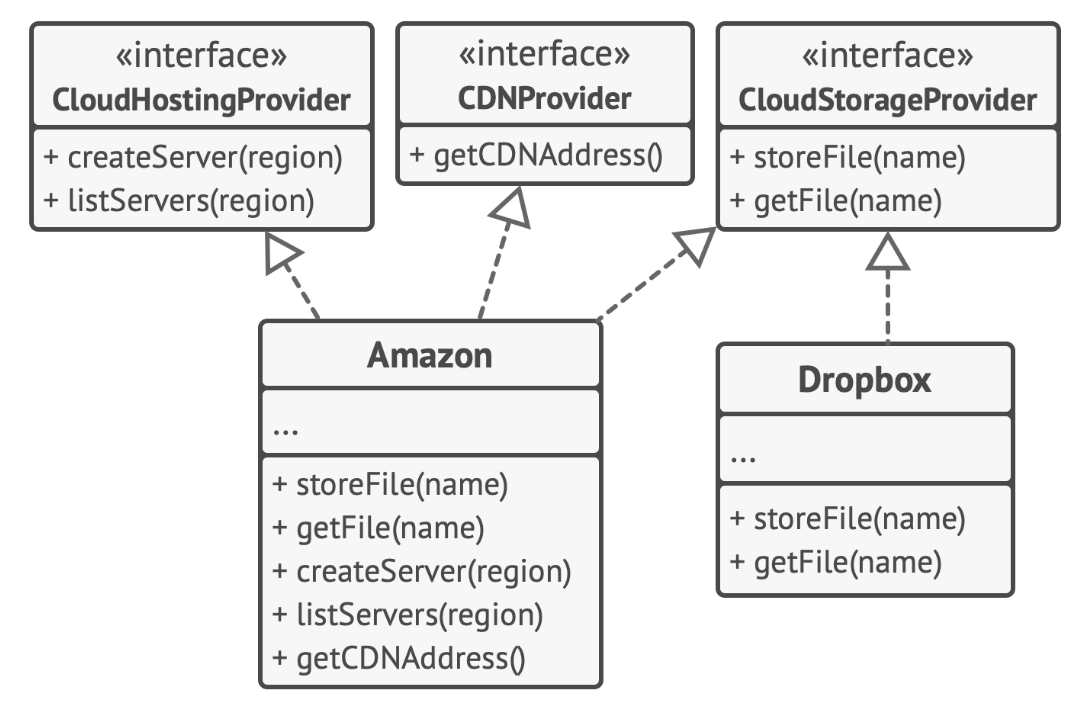

In [4]:
class CloudHostingProvider(ABC):
    @abstractmethod
    def create_server(self, region):
        pass

    @abstractmethod
    def list_servers(self, region):
        pass


class CDNProvider(ABC):
    @abstractmethod
    def get_cdn_address(self):
        pass


class CloudStorageProvider(ABC):
    @abstractmethod
    def store_file(self, name):
        pass

    @abstractmethod
    def get_file(self, name):
        pass

In [5]:
class Amazon(CloudStorageProvider, CloudHostingProvider, CDNProvider):
    def store_file(self, name):
        print(f"Storing {name} in Amazon S3")

    def get_file(self, name):
        print(f"Getting {name} from Amazon S3")

    def create_server(self, region):
        print(f"Creating server in {region} on Amazon EC2")

    def list_servers(self, region):
        print(f"Listing servers in {region} on Amazon EC2")

    def get_cdn_address(self):
        print("Getting CDN address from Amazon CloudFront")

In [6]:
class Dropbox(CloudStorageProvider):
    def store_file(self, name):
        print(f"Storing {name} in Dropbox")

    def get_file(self, name):
        print(f"Getting {name} from Dropbox")